In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pit
import statsmodels.formula. api as smf
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split


In [3]:
#importing Data set
data = pd.read_excel('bitcoin_dataset.xlsx')
data.head()



,Unnamed: 0,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code

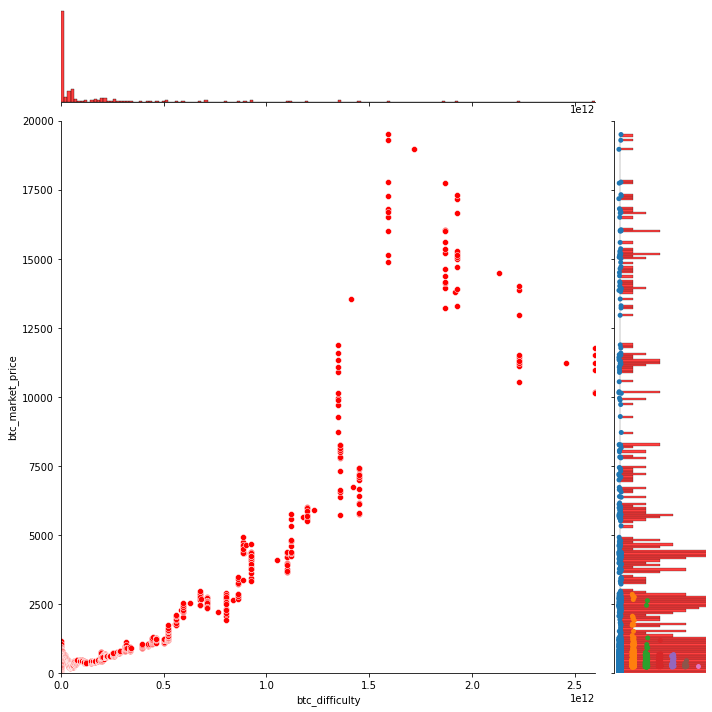

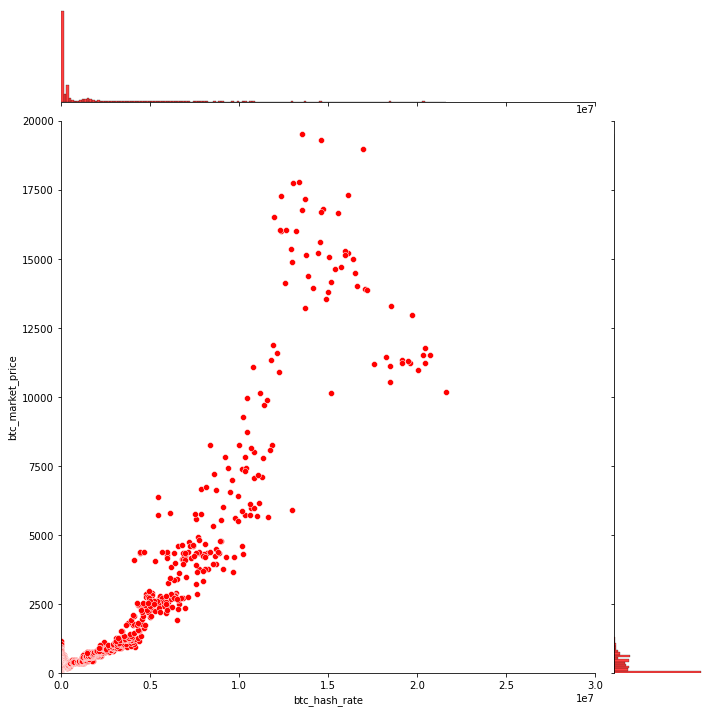

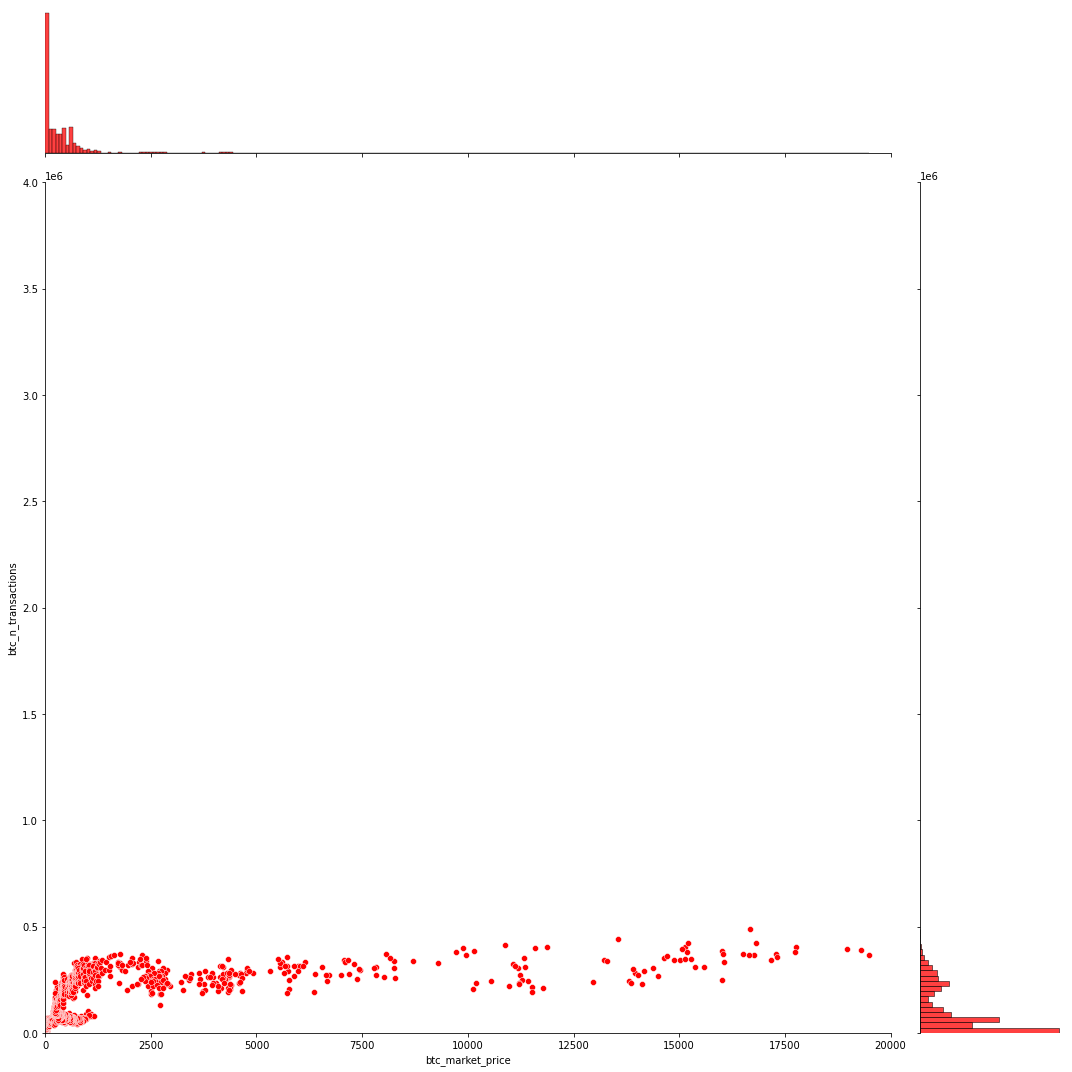

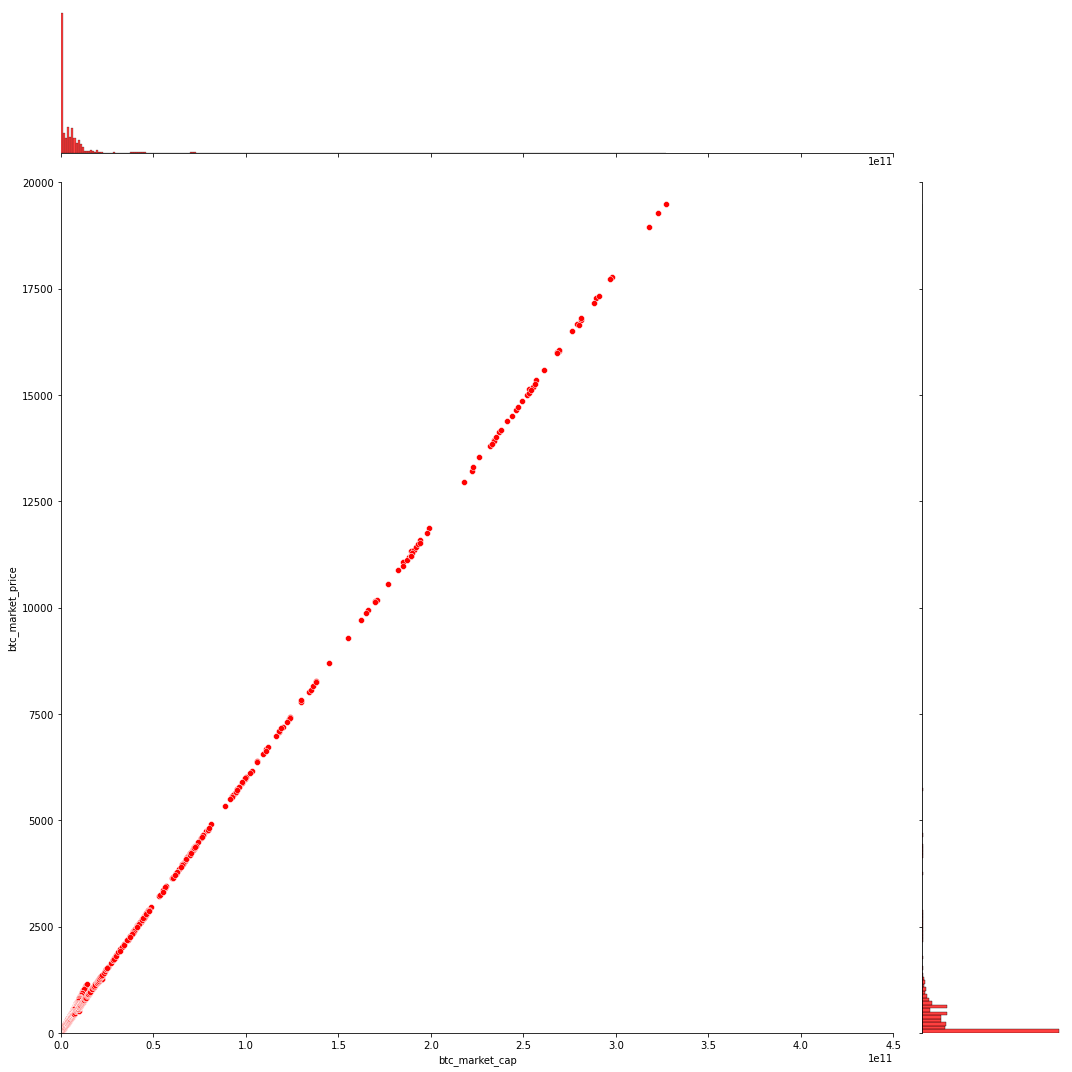

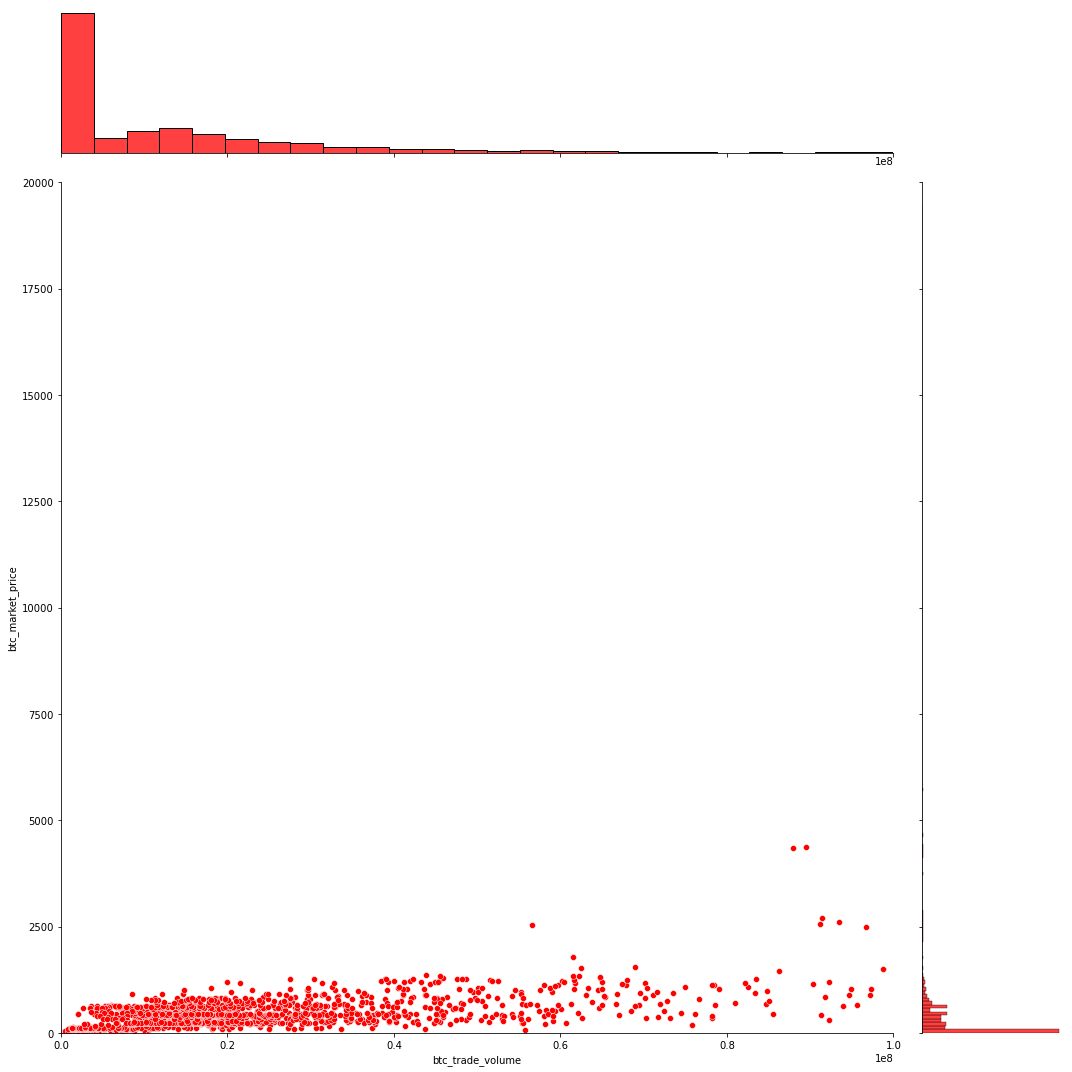

In [3]:
#Checking the dependency between the features and the target variables using joinplot and strip plot
a= sns.jointplot('btc_difficulty', 'btc_market_price' , data = data , xlim = (0, 2.6E+12) , ylim = (0,20000), color = 'r', size =10 )
k =sns.stripplot( x = 'btc_n_orphaned_blocks', y = 'btc_market_price' , data = data , jitter = True)
c= sns.jointplot('btc_hash_rate', 'btc_market_price' , data = data , xlim = (0, 30000000) , ylim = (0,20000), color = 'r', size =10 )
d= sns.jointplot('btc_market_price' , 'btc_n_transactions' , data = data , ylim = (0, 4000000) , xlim = (0,20000), color = 'r', size =15 )
f= sns.jointplot('btc_market_cap', 'btc_market_price' , data = data , xlim = (0, 450000000000) , ylim = (0,20000), color = 'r', size =15 )
e= sns.jointplot('btc_trade_volume', 'btc_market_price' , data = data , xlim = (0, 100000000) , ylim = (0,20000), color = 'r', size = 15)


In [4]:
#Finding the null value and selecting the required feature variable for filling the data
data.isnull().sum()

Unnamed: 0                                              0
Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_a

In [5]:
#filling the required variables using fillna
data['btc_trade_volume'].fillna(data['btc_trade_volume'].median(),inplace = True)
data['btc_transaction_fees'].fillna(data['btc_transaction_fees'].median(),inplace = True)
data['btc_difficulty'].fillna(data['btc_difficulty'].mean(),inplace = True)

In [6]:
#Creating a dataset with target variable and required features 
df= data[['btc_market_price','btc_market_cap', 'btc_n_transactions' , 'btc_miners_revenue' , 'btc_cost_per_transaction' , 'btc_difficulty' , 'btc_hash_rate' , 'btc_cost_per_transaction_percent']]

In [7]:
df.head()

,btc_market_price,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [8]:
#spliting the data into 2 parts one for features (x) and other for target varible(y)
x=df.drop('btc_market_price',axis=1).values
y=df['btc_market_price'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Spliting the data for training and testing
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8)



In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
#initializing Linear regression
algo = LinearRegression()

In [14]:
#fitting the model
algo.fit(x_train,y_train)

LinearRegression()

In [15]:
ypred = algo.predict(x_test)

In [16]:
#Testing the score 
algo.score(x_test,y_test)

0.9999390284202163

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
print(mean_absolute_error(y_test,ypred))

13.219902710899678


In [19]:
ypred

array([ 6.02469817e+02,  9.43855167e+02, -1.32694193e+01,  4.76822720e+02,
        9.25279316e+00,  1.08377008e+04,  2.78907595e+02,  1.32983772e+02,
       -9.12044750e+00, -1.32664786e+01,  6.36554195e+02,  6.84920938e+02,
        7.16964760e+03,  2.50388658e+02,  4.81649524e+01,  4.63918740e+02,
        1.09881594e+03,  4.14261925e+02,  1.12942574e+03,  8.22442844e+01,
       -1.81068235e+00,  2.71422244e+02, -4.93577555e+00,  2.53061097e+02,
       -1.32866696e+01,  2.80943493e+01, -1.32953760e+01, -1.32423708e+01,
        6.96501043e+02, -1.33026834e+01,  1.35309851e+01, -1.32773172e+01,
        5.43162146e+02,  4.30314029e+02,  1.37921781e+01,  1.41182385e+01,
       -1.32632720e+01,  2.64838065e+03,  4.20169304e+01,  4.19441380e+02,
        2.74496150e+02,  3.85803380e+02,  7.26237833e+02,  3.41392579e+02,
        3.04241084e+02,  4.15490657e+02,  1.73959800e+00,  5.14496818e+01,
        2.71085205e+02,  6.67280356e+02,  3.91650923e+03,  7.78233275e+02,
        1.51339787e+01,  

In [20]:
test =df[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']]
test_predict = algo.predict(test)
test_predict

array([  -13.28806509,   -13.26051978,   -12.99954023, ...,
       11261.14284941, 10169.94665097, 10142.61441728])